In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import re
import warnings
warnings.filterwarnings('ignore')

# importing the data form csvs

In [2]:
ag_all_bh = pd.read_csv('ag_all_bh.csv')
ag_col_bh = pd.read_csv('ag_col_bh.csv')
ag_merge_bh = pd.read_csv('ag_merge_bh.csv')
ag_col = pd.read_csv('ag_col.csv')
ag_merge = pd.read_csv('ag_merge.csv')


In [3]:
ag_col_bh

,time_x,collision_type,idm,mm,id1,m1,id2,m2,r_x,typem,...,time_y,r_y,binary,ID,zams_m,m_progenitor,bh_mass,bh_spin,birth_kick,model
0,11.565179,single-single,1680002,33.8986,1680001,33.7704,470820,0.129842,0.038822,4,...,11.885657,0.191185,0,1680002,0.000000,17.89330,16.09650,0.0,1.00000,data\N16rv0.5rg2.0Z0.002
1,7.978654,single-single,1680061,133.8740,1680060,179.9130,299190,0.394966,0.013368,4,...,8.287822,0.137582,1,1680061,0.000000,33.00390,29.70350,0.0,0.00000,data\N16rv0.5rg2.0Z0.002
2,3.710148,single-single,1680133,110.5980,1680132,110.4200,261872,0.179723,0.025530,4,...,4.003505,0.144856,1,1680133,0.000000,35.19190,31.67270,0.0,0.00000,data\N16rv0.5rg2.0Z0.002
3,4.100341,single-single,1680220,41.3707,1680219,41.2697,328483,0.105145,0.052498,4,...,4.334216,0.069415,0,1680220,0.341818,34.12200,30.70980,0.0,1.00000,data\N16rv0.5rg2.0Z0.002
4,3.849036,single-single,1680292,52.0011,1680291,51.8734,137163,0.133144,0.041029,4,...,4.083307,0.034394,0,1680292,0.169725,40.61420,36.55280,0.0,1.00000,data\N16rv0.5rg2.0Z0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25558,7.467068,single-single,867397,27.4788,27397,27.2059,34148,0.274166,0.809076,4,...,7.467073,0.809076,0,867397,1.377720,29.83110,12.91490,0.0,196.38100,data\N8.0rv4.0rg8.0Z0.002
25559,8.195550,single-single,935010,21.1569,95010,21.0637,260784,0.094146,1.787344,4,...,8.195555,1.787344,0,935010,0.376952,29.08860,11.89070,0.0,89.37041,data\N8.0rv4.0rg8.0Z0.002
25560,8.195550,single-single,1021125,23.4548,239877,23.3603,181125,0.095204,2.219268,4,...,8.195555,2.219268,0,1021125,0.000000,28.60760,11.48710,0.0,149.45210,data\N8.0rv4.0rg8.0Z0.002
25561,6.479118,single-single,901838,26.2744,61838,26.0639,69692,0.210457,0.995484,1,...,17.584706,1.914572,0,901838,58.609600,8.76791,7.63069,0.0,1.00000,data\N8.0rv4.0rg8.0Z0.02


## Grouping 

## multiindex data frame test

In [4]:
ag_col_bh['int_type'] = pd.Categorical(
    np.select([
        (ag_col_bh['type1'].isin([0,1]) & ag_col_bh['type2'].isin([0,1])),
        (ag_col_bh['type1'].isin(range(2,10)) & ag_col_bh['type2'].isin(range(2,10))),
        ((ag_col_bh['type1'].isin([0,1]) & ag_col_bh['type2'].isin(range(2,10))) | 
         (ag_col_bh['type1'].isin(range(2,10)) & ag_col_bh['type2'].isin([0,1]))),
        ((ag_col_bh['type1'] >= 10) | (ag_col_bh['type2'] >= 10))
    ], ['MS+MS', 'Giant+Giant', 'MS+Giant', 'Other'], default='Unknown'),
    categories=['MS+MS', 'MS+Giant', 'Giant+Giant', 'Other', 'Unknown'],
    ordered=True
)


In [5]:
df_processed = ag_col_bh.copy()

# Mass ratio categories
df_processed['q'] = pd.cut(
    df_processed['mass_ratio'], 
    bins=[0, 0.01, 0.1, 1.0], 
    labels=['0.01', '0.1', '1'],
    include_lowest=True
)

# Type categories
df_processed['type'] = df_processed['typem'].apply(
    lambda x: 'MS' if x in [0, 1] else 'Giant' if x in [2, 3, 4, 5, 6, 7, 8, 9] else 'Other'
)

# Larger mass categories
df_processed['pm'] = pd.cut(
    df_processed['larger_mass'], 
    bins=[0,10, 50, 100, 150], 
    labels=['10','50', '100', '150'],
    include_lowest=True
)

# Create MultiIndex DataFrame
col = df_processed.set_index(['q', 'type', 'pm','int_type'])
col

time_x collision_type      idm        mm      id1  \
q    type  pm  int_type                                                         
0.01 Giant 50  MS+Giant  11.565179  single-single  1680002   33.8986  1680001   
           nan MS+Giant   7.978654  single-single  1680061  133.8740  1680060   
           150 MS+Giant   3.710148  single-single  1680133  110.5980  1680132   
           50  MS+Giant   4.100341  single-single  1680220   41.3707  1680219   
           100 MS+Giant   3.849036  single-single  1680292   52.0011  1680291   
...                            ...            ...      ...       ...      ...   
0.1  Giant 50  MS+Giant   7.467068  single-single   867397   27.4788    27397   
0.01 Giant 50  MS+Giant   8.195550  single-single   935010   21.1569    95010   
               MS+Giant   8.195550  single-single  1021125   23.4548   239877   
     MS    50  MS+MS      6.479118  single-single   901838   26.2744    61838   
     Giant 50  MS+Giant   5.730905  single-single   979285   31.3418   220037   

                               m1     id2        m2       r_x  typem  ...  \
q    type  pm  int_type                                               ...   
0.01 Giant 50  MS+Giant   33.7704  470820  0.129842  0.038822      4  ...   
           nan MS+Giant  179.9130  299190  0.394966  0.013368      4  ...   
           150 MS+Giant  110.4200  261872  0.179723  0.025530      4  ...   
           50  MS+Giant   41.2697  328483  0.105145  0.052498      4  ...   
           100 MS+Giant   51.8734  137163  0.133144  0.041029      4  ...   
...                           ...     ...       ...       ...    ...  ...   
0.1  Giant 50  MS+Giant   27.2059   34148  0.274166  0.809076      4  ...   
0.01 Giant 50  MS+Giant   21.0637  260784  0.094146  1.787344      4  ...   
               MS+Giant   23.3603  181125  0.095204  2.219268      4  ...   
     MS    50  MS+MS      26.0639   69692  0.210457  0.995484      1  ...   
     Giant 50  MS+Giant   31.2379  139285  0.104337  2.409768      4  ...   

                            time_y       r_y  binary       ID     zams_m  \
q    type  pm  int_type                                                    
0.01 Giant 50  MS+Giant  11.885657  0.191185       0  1680002   0.000000   
           nan MS+Giant   8.287822  0.137582       1  1680061   0.000000   
           150 MS+Giant   4.003505  0.144856       1  1680133   0.000000   
           50  MS+Giant   4.334216  0.069415       0  1680220   0.341818   
           100 MS+Giant   4.083307  0.034394       0  1680292   0.169725   
...                            ...       ...     ...      ...        ...   
0.1  Giant 50  MS+Giant   7.467073  0.809076       0   867397   1.377720   
0.01 Giant 50  MS+Giant   8.195555  1.787344       0   935010   0.376952   
               MS+Giant   8.195555  2.219268       0  1021125   0.000000   
     MS    50  MS+MS     17.584706  1.914572       0   901838  58.609600   
     Giant 50  MS+Giant   6.479118  1.671008       0   979285   0.000000   

                         m_progenitor   bh_mass  bh_spin  birth_kick  \
q    type  pm  int_type                                                
0.01 Giant 50  MS+Giant      17.89330  16.09650      0.0     1.00000   
           nan MS+Giant      33.00390  29.70350      0.0     0.00000   
           150 MS+Giant      35.19190  31.67270      0.0     0.00000   
           50  MS+Giant      34.12200  30.70980      0.0     1.00000   
           100 MS+Giant      40.61420  36.55280      0.0     1.00000   
...                               ...       ...      ...         ...   
0.1  Giant 50  MS+Giant      29.83110  12.91490      0.0   196.38100   
0.01 Giant 50  MS+Giant      29.08860  11.89070      0.0    89.37041   
               MS+Giant      28.60760  11.48710      0.0   149.45210   
     MS    50  MS+MS          8.76791   7.63069      0.0     1.00000   
     Giant 50  MS+Giant       9.91991   6.05481      0.0   257.86510   

                                             m

In [6]:
q_list = ['0.01', '0.1', '1']
type_list=['MS','Giant']
pm_list= ['10','50', '100', '150']
int_list=['MS+MS', 'MS+Giant', 'Giant+Giant', 'Other', 'Unknown']
groups = {}
names = []

# # Mass ratio and type m filtering
# for q in q_list:
#     for type in type_list:
#         variable_name = f"col_{q}_{type}"
#         names.append(variable_name)
#         groups[variable_name] = col.loc[q,type,:,:]

# # Mass ratio and interaction type filtering
# for q in q_list:
#     for int in int_list:
#         variable_name = f"col_{q}_{int}"
#         names.append(variable_name)
#         groups[variable_name] = col.loc[q,:,:,int]


# Only interaction type filtering

for int in int_list:
    variable_name = f"col_{int}"
    names.append(variable_name)
    groups[variable_name] = col.loc[:,:,:,int]

        


In [7]:
def sumarise_col(cluster_data):
        col_stats={
        'count': len(cluster_data),
        'percentage': len(cluster_data) / len(col) * 100,
        'avg_smaller_mass': cluster_data['smaller_mass'].mean(),
        'avg_larger_mass': cluster_data['larger_mass'].mean(),
        'avg_mass_ratio': cluster_data['mass_ratio'].mean(),
        'avg_merged_mass': cluster_data['mm'].mean(),
        'median_smaller_mass': cluster_data['smaller_mass'].median(),
        'median_larger_mass': cluster_data['larger_mass'].median(),
        'median_mass_ratio': cluster_data['mass_ratio'].median(),
        'median_merged_mass': cluster_data['mm'].median()

        }

        print("-" * 25) 

        for k, v in col_stats.items():
             print(f"{k:<10} {v:<15}")
        print("-" * 25) 
        return col_stats



In [8]:
groups[names[0]]

time_x collision_type      idm        mm      id1        m1  \
q    type pm                                                                    
0.01 MS   100   3.101171  binary-single  1689424   91.6353     9424   91.5253   
          150   6.892310  single-single  1692519  116.2320  1692518  116.0870   
          100  10.072809  binary-single  1699097   83.2637  1744929   83.1649   
          100   7.483465  binary-single  1706983   94.8166  1706982   94.0114   
0.1  MS   50    4.022658  single-single  1707419   26.0050   692241   25.6419   
...                  ...            ...      ...       ...      ...       ...   
          50    3.199974  single-single  1197979   21.6682   499712   20.7715   
0.01 MS   50    3.670268  single-single   846409   46.5644     6409   46.3995   
          150   1.955391  binary-single   850657  102.5440    10657  102.4460   
          150   1.629516  single-single  1028351  107.5480   188351  107.4230   
          50    6.479118  single-single   901838   26.2744    61838   26.0639   

                   id2        m2       r_x  typem  ...     time_y       r_y  \
q    type pm                                       ...                        
0.01 MS   100   348419  0.109969  0.018274      1  ...   6.718163  0.080643   
          150  1092822  0.145747  0.039486      1  ...  10.572855  0.037041   
          100    19096  0.098736  0.060115      1  ...  13.762736  0.071137   
          100   359722  0.805201  0.056570      1  ...  11.235989  0.171196   
0.1  MS   50     27419  0.363101  0.198374      1  ...  11.975629  1.405015   
...                ...       ...       ...    ...  ...        ...       ...   
          50    357979  0.896735  3.011356      1  ...  13.869639  4.594240   
0.01 MS   50    186356  0.164946  2.474312      1  ...   9.310174  0.343672   
          150    12219  0.097755  0.613264      1  ...   5.648451  0.660296   
          150   215425  0.125133  2.824044      1  ...   5.368345  4.416080   
          50     69692  0.210457  0.995484      1  ...  17.584706  1.914572   

               binary       ID     zams_m  m_progenitor   bh_mass  bh_spin  \
q    type pm                                                                 
0.01 MS   100       0  1689424   0.160949      31.88100  28.69290      0.0   
          150       0  1692519   0.127146      36.38780  32.74900      0.0   
          100       1  1699097   0.000000      28.77680  25.89910      0.0   
          100       0  1706983   0.106141      33.00080  29.70070      0.0   
0.1  MS   50        0  1707419   0.217993      25.74440   8.60303      0.0   
...               ...      ...        ...           ...       ...      ...   
          50        0  1197979   0.000000      21.53020  16.77540      0.0   
0.01 MS   50        0   846409   0.000000      10.73270   6.66235      0.0   
          150       1   850657   0.000000      40.87930  36.79140      0.0   
          150       0  1028351   0.000000     104.15100  40.50000      0.0   
          50        0   901838  58.609600       8.76791   7.63069      0.0   

               birth_kick                       model  
q    type pm                                           
0.01 MS   100     1.00000    data\N16rv0.5rg2.0Z0.002  
          150     1.00000    data\N16rv0.5rg2.0Z0.002  
          100     0.00000    data\N16rv0.5rg2.0Z0.002  
          100     1.00000    data\N16rv0.5rg2.0Z0.002  
0.1  MS   50    247.84410    data\N16rv0.5rg2.0Z0.002  
...                   ...                         ...  
          50      1.00000   data\N8.0rv4.0rg2.0Z0.002  
0.01 MS   50     93.37391    data\N8.0rv4.0rg2.0Z0.02  
          150     0.00000  data\N8.0rv4.0rg20.0Z0.002  
          150     1.00000  data\N8.0rv4.0rg8.0Z0.0002  
          50      1.00000    data\N8.0rv4.0rg8.0Z0.02  

[3071 rows x 25 columns]

In [9]:
group_list=[]
for name in names:

    print(f'Group params {name}')
    sumarise_col(groups[name])
    group_list.append(sumarise_col(groups[name].copy())
)


Group params col_MS+MS
-------------------------
count      3071           
percentage 12.01345694949732
avg_smaller_mass 0.8036139679908825
avg_larger_mass 59.081715971996104
avg_mass_ratio 0.020165477900206452
avg_merged_mass 59.885326310648
median_smaller_mass 0.199938       
median_larger_mass 51.7008        
median_mass_ratio 0.0040506870229007
median_merged_mass 52.2503        
-------------------------
-------------------------
count      3071           
percentage 12.01345694949732
avg_smaller_mass 0.8036139679908825
avg_larger_mass 59.081715971996104
avg_mass_ratio 0.020165477900206452
avg_merged_mass 59.885326310648
median_smaller_mass 0.199938       
median_larger_mass 51.7008        
median_mass_ratio 0.0040506870229007
median_merged_mass 52.2503        
-------------------------
Group params col_MS+Giant
-------------------------
count      22150          
percentage 86.64867190861793
avg_smaller_mass 0.6669368275124153
avg_larger_mass 34.00355099638826
avg_mass_ratio 0.02

# groups summarised

In [10]:
group_sum = pd.DataFrame(group_list)
group_sum= group_sum.set_axis(names).round(3)
group_sum

,count,percentage,avg_smaller_mass,avg_larger_mass,avg_mass_ratio,avg_merged_mass,median_smaller_mass,median_larger_mass,median_mass_ratio,median_merged_mass
col_MS+MS,3071,12.013,0.804,59.082,0.020,59.885,0.200,51.701,0.004,52.250
col_MS+Giant,22150,86.649,0.667,34.004,0.023,33.918,0.209,26.104,0.008,26.302
col_Giant+Giant,54,0.211,23.197,33.898,0.749,56.283,19.037,26.193,0.809,44.944
col_Other,3,0.012,1.190,12.853,0.096,14.037,1.182,12.880,0.088,14.014
col_Unknown,285,1.115,1.647,78.878,0.030,74.066,0.196,65.193,0.003,63.329


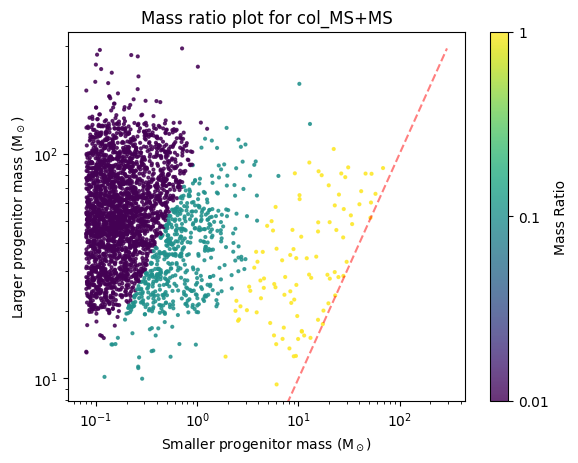

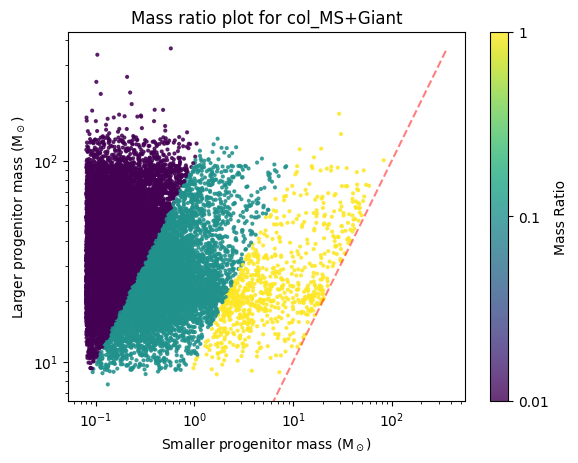

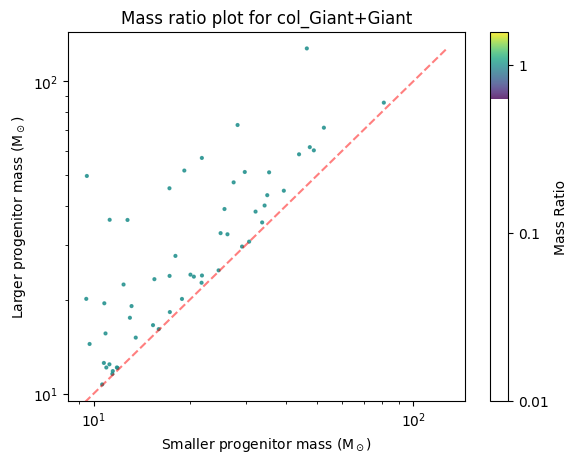

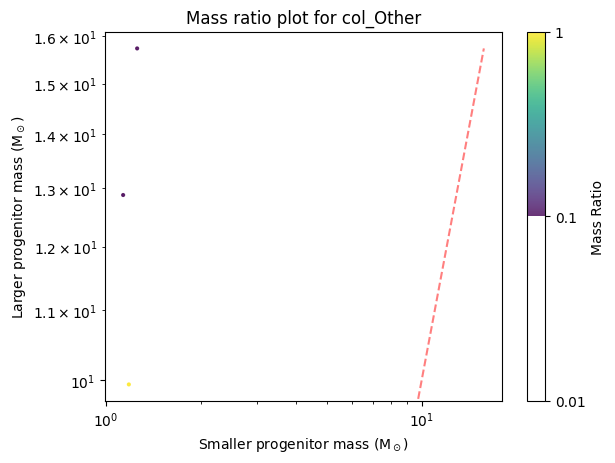

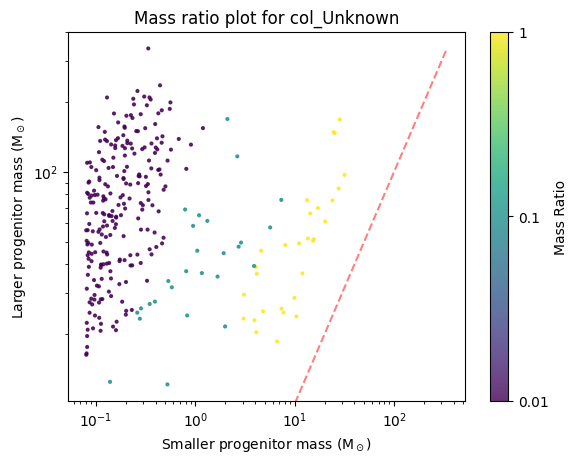

In [11]:
for name in names:
    col_plot = groups[name].copy()
    plt.figure()
    
    # Create categorical bins
    col_plot['q'] = pd.cut(
        col_plot['mass_ratio'], 
        bins=[0, 0.01, 0.1, 1.0], 
        labels=['0.01', '0.1', '1'],
        include_lowest=True
    )
    
    # Convert categorical to numerical codes 
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['q'].cat.codes, cmap='viridis', alpha=.8, s=4)
    
    maxi = col_plot['larger_mass'].max()
    plt.plot([0,maxi],[0,maxi],'r--',alpha=.5)
    
    # Create colorbar  labels
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')
    cb.set_ticks([0, 1, 2])  
    cb.set_ticklabels(['0.01', '0.1', '1'])
    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.show()


# groups plotted

## median line and point func def

In [12]:
def median_line(col_plot):
        median_mass_ratio_overall = col_plot['mass_ratio'].median()
        
        x_min = col_plot['smaller_mass'].min()
        x_max = col_plot['smaller_mass'].max()
        y_min = col_plot['larger_mass'].min()
        y_max = col_plot['larger_mass'].max()
        
        # Create x range for the line
        x_range = np.logspace(np.log10(x_min), np.log10(x_max), 100)
        y_line = x_range / median_mass_ratio_overall
        
        # LIMIT the line 
        mask = (y_line >= y_min) & (y_line <= y_max)
        x_line_limited = x_range[mask]
        y_line_limited = y_line[mask]
        
        plt.plot(x_line_limited, y_line_limited, 'k-', linewidth=2, label=f'Median Mass Ratio = {median_mass_ratio_overall:.3f}', zorder=4)

In [13]:
# def median_point(df, color='red', label='Median ± 1σ', zorder=5):
#     """Plot median point with error bars using standard deviation"""
#     med_smaller = df['smaller_mass'].median()
#     med_larger = df['larger_mass'].median()
#     std_smaller = df['smaller_mass'].std()
#     std_larger = df['larger_mass'].std()
    
#     plt.errorbar(med_smaller, med_larger, 
#                  xerr=std_smaller, yerr=std_larger,
#                  fmt='o', color=color, ecolor=color, 
#                  elinewidth=2, capsize=4, markersize=8,
#                  label=label, zorder=zorder)
    
def median_point(df, color='black', label='Median ± IQR', zorder=5):
    med_smaller = df['smaller_mass'].median()
    med_larger = df['larger_mass'].median()
    #using quartiles since std tends to get distorted in the graph
    q25_smaller = df['smaller_mass'].quantile(0.25)
    q75_smaller = df['smaller_mass'].quantile(0.75)
    q25_larger = df['larger_mass'].quantile(0.25)
    q75_larger = df['larger_mass'].quantile(0.75)

    xerr_lower = med_smaller - q25_smaller
    xerr_upper = q75_smaller - med_smaller
    yerr_lower = med_larger - q25_larger
    yerr_upper = q75_larger - med_larger

    plt.errorbar(med_smaller, med_larger, 
                    xerr=[[xerr_lower], [xerr_upper]], 
                    yerr=[[yerr_lower], [yerr_upper]],
                    fmt='o', color=color, ecolor=color, 
                    elinewidth=2, capsize=4, markersize=8,
                    label=label, zorder=zorder)



## overall median group plots

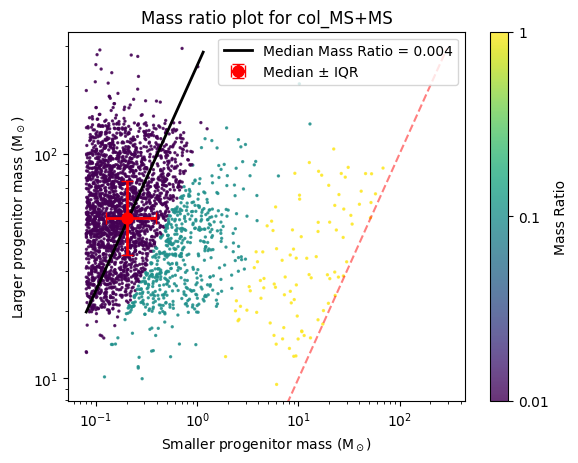

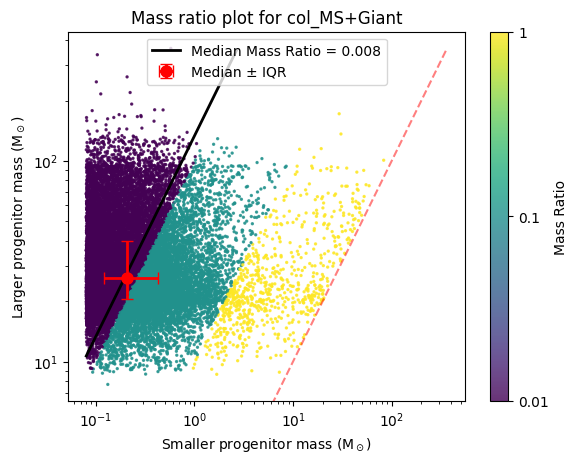

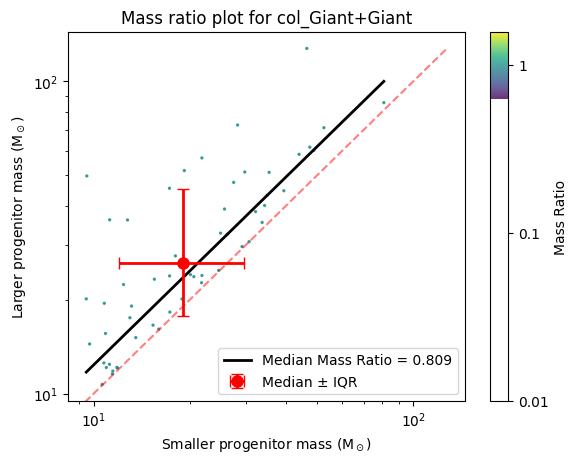

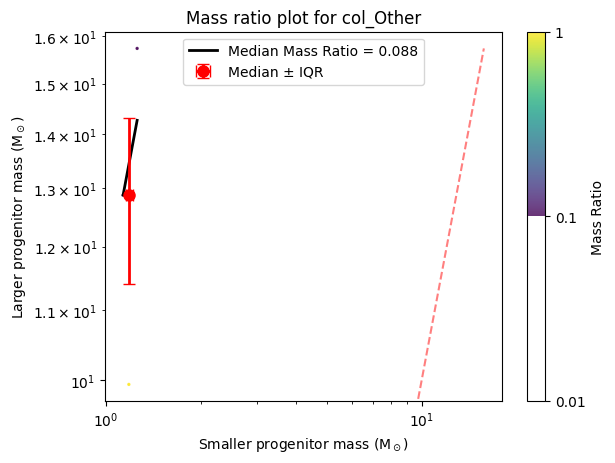

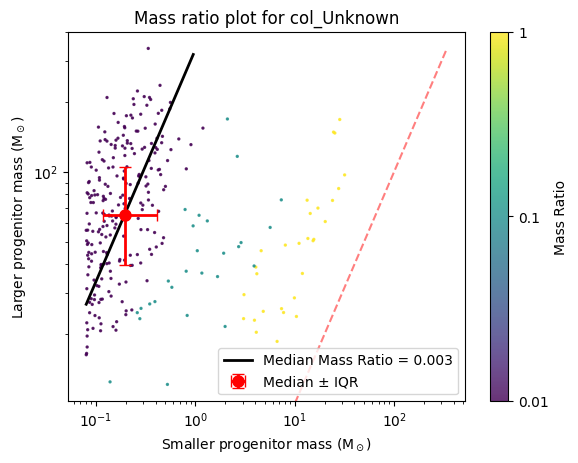

In [14]:

for name in names:
    col_plot = groups[name].copy()
    plt.figure()
    col_plot = col_plot.reset_index()
    
    # Create categorical bins
    col_plot['q'] = pd.cut(
        col_plot['mass_ratio'], 
        bins=[0, 0.01, 0.1, 1.0], 
        labels=['0.01', '0.1', '1'],
        include_lowest=True
    )
    
    # Convert categorical to numerical codes 
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['q'].cat.codes, cmap='viridis', alpha=.8, s=2)
    
    maxi = col_plot['larger_mass'].max()
    plt.plot([0,maxi],[0,maxi],'r--',alpha=.5)
    
    # Create colorbar labels
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')
    cb.set_ticks([0, 1, 2])  
    cb.set_ticklabels(['0.01', '0.1', '1'])

        
    #making over all median line and pont
    median_line(col_plot)
    median_point(col_plot, color='red')




    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.legend()
    plt.show()


# group median plots 

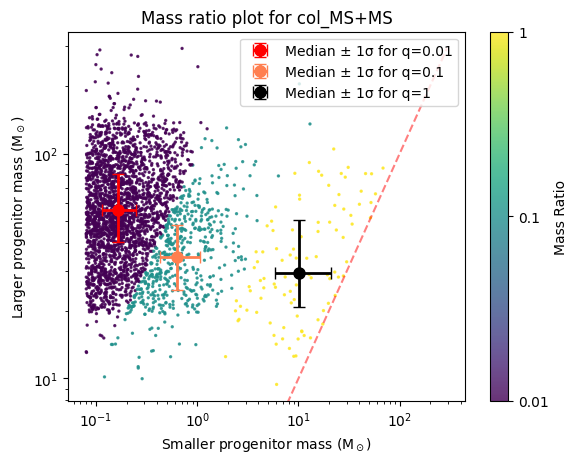

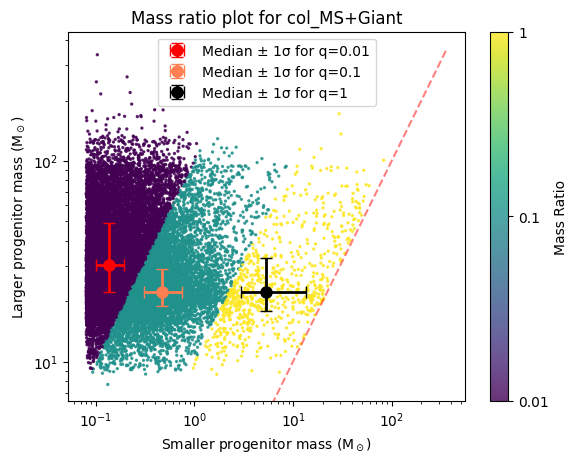

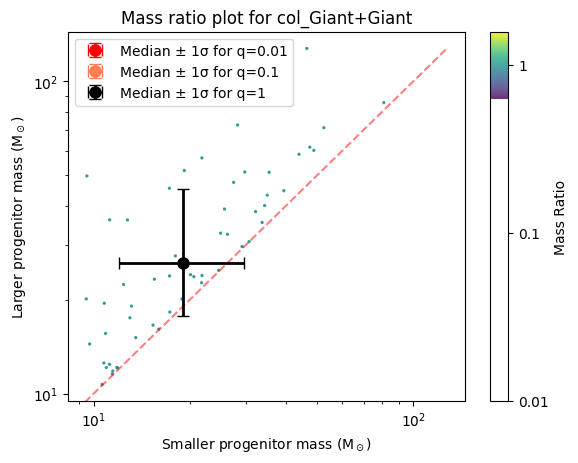

In [15]:
for name in names[:3]:
    col_plot = groups[name].copy()
    plt.figure()
    col_plot = col_plot.reset_index()
    
    # Create categorical bins
    col_plot['q'] = pd.cut(
        col_plot['mass_ratio'], 
        bins=[0, 0.01, 0.1, 1.0], 
        labels=['0.01', '0.1', '1'],
        include_lowest=True
    )
    
    # Convert categorical to numerical codes 
    sc = plt.scatter(col_plot['smaller_mass'], col_plot['larger_mass'], 
                     c=col_plot['q'].cat.codes, cmap='viridis', alpha=.8, s=2)
    
    maxi = col_plot['larger_mass'].max()
    plt.plot([0,maxi],[0,maxi],'r--',alpha=.5)
    
    # Create colorbar labels
    cb = plt.colorbar(sc)
    cb.set_label('Mass Ratio')
    cb.set_ticks([0, 1, 2])  
    cb.set_ticklabels(['0.01', '0.1', '1'])

    # Making overall median line
    # median_line(col_plot)
    
    # Plot separate median points for each category
    colors = ['red', 'coral', 'black']  # Different colors for each category
    for i, category in enumerate(['0.01', '0.1', '1']):
        category_data = col_plot[col_plot['q'] == category]
        median_point(category_data, 
                    color=colors[i], 
                    label=f'Median ± 1σ for q={category}', 
                    zorder=6)
    
    plt.xlabel('Smaller progenitor mass (M$_\odot$)')
    plt.ylabel('Larger progenitor mass (M$_\odot$)')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'Mass ratio plot for {name}')
    plt.legend()
    plt.show()


# plotting bh masses for each group

In [16]:
groups[names[2]]

time_x collision_type      idm        mm      id1        m1  \
q type  pm                                                                    
1 Giant 50    7.498067  single-single  1713047   74.7689  1713045   47.4477   
        100   7.027298  single-single  1728689  100.5400  1735035   72.4229   
        100   7.182532  single-single  1790588   70.8578  1790586   51.7626   
        150   4.420167  single-single  1922654  173.7600  1922652  127.3800   
        50   10.458705  single-single  1691101   31.8722    11101   16.5561   
        50    7.730365  single-single  1698035   23.5533  1698033   12.4038   
        50   14.840025  single-single  2501835   23.9345  1247445   12.0720   
        100   3.814639  single-single  1680165  123.2220  1899535   70.9984   
        100   4.681590  single-single  1708766   80.7889  1708764   51.2164   
        100   4.057082  single-single  1758324  108.7280  1973597   60.0771   
        50   21.481791  single-single  2396141   17.0647   716141   11.7999   
        50    8.011477  binary-single  1737571   38.6993  1654618   23.2362   
        50    8.189698  single-single  1758360   59.2092  1758359   49.7372   
        50   14.433699  single-single  2684745   23.9284  1004745   12.1224   
        50    7.351404  single-single  1684487   78.0073  1814370   43.1668   
        50   12.929212  single-single  1695244   23.2735  2269430   12.5287   
        50    4.266658  single-single  1709665   83.8778  1709663   44.6134   
        50    7.007539  single-single  1752653   62.6516  1752652   45.4269   
        50   11.488849  single-single  1789593   30.4426  1789592   17.4819   
        50    6.556078  binary-binary  1832092   22.7110  1636716   14.4095   
        50   10.644001  single-single  1897319   26.4346  1897318   15.5752   
        50    6.234793  single-single  2103605   29.5396   423604   20.0964   
        100   3.896085  single-single  1715016  101.9100  1795919   58.3545   
        50    6.507843  single-single  1811068   45.5274   522599   27.5865   
        50   15.221150  single-single  1809742   22.9818   129742   11.5560   
        100   3.691675  single-single  1694551  108.2030  1694549   61.5075   
        100   3.420670  single-single  1695580  165.8830  1695578   85.3934   
        50    4.664095  single-single  1735710   57.5218  1257427   32.6280   
        50    3.902289  single-single  1833939   64.5359   153939   38.9778   
        50    4.485641  single-single  2270245   74.0625  1037269   40.0001   
        50   11.082456  single-single   240212   28.6248   113147   15.1022   
        50   15.473362  single-single   252142   23.0542    42142   12.1145   
        50    8.258846  single-single   212133   38.9537     2133   20.0856   
        50    7.583901  single-single   607416   58.5004   607415   32.3569   
        50    9.122608  binary-single   678075   44.3613   401491   22.6343   
        50    8.650089  single-single   422134   32.0344     2133   16.0787   
        50    6.478517  binary-single   487849   46.3739   208370   30.6450   
        50    4.859003  binary-single   220953   32.0921    25648   19.0556   
        100   5.735692  binary-single   853643   86.4386   853642   51.0910   
        50    5.884730  binary-binary   860101   68.9292   831908   35.3095   
        100   5.190189  single-single   866715   78.5787   866714   56.8069   
        50    5.386669  single-single   977507   58.6355   137507   29.5540   
        50    5.203903  binary-binary   846657   40.9381   846655   23.8035   
        50    7.391595  single-single   885014   44.1830   885012   23.6713   
        50    8.366179  single-single   945386   45.6518   165019   23.8762   
        50    8.155318  single-single   944975   43.6604   983584   35.9600   
        50   24.835316  binary-binary  1314664   15.2683   474664   10.6941   
        50    8.660940  single-single   930567   35.4715   944148   18.2336   
        50    7.969526  single-single  1163371   42.6937   323371 

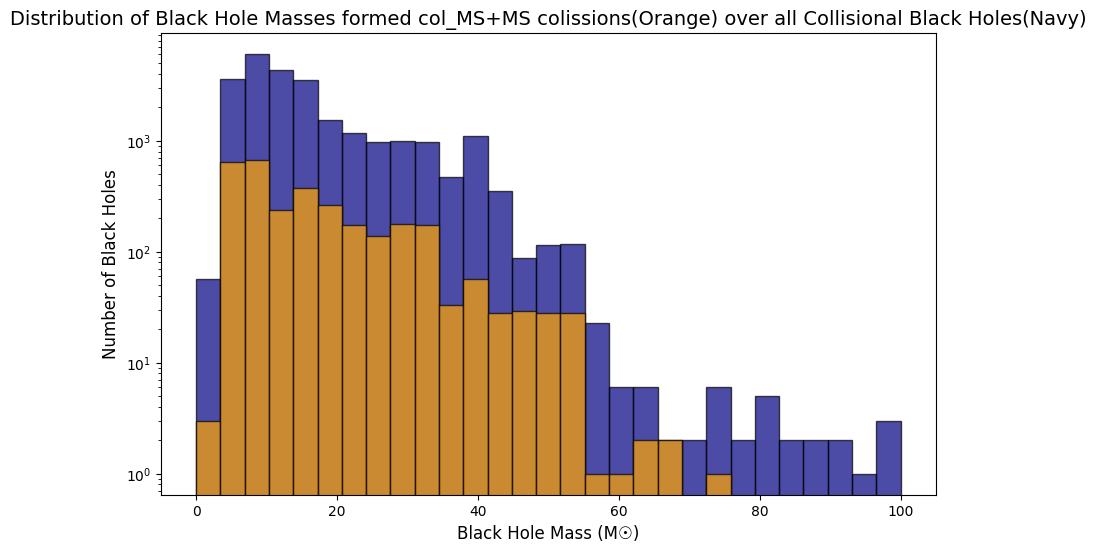

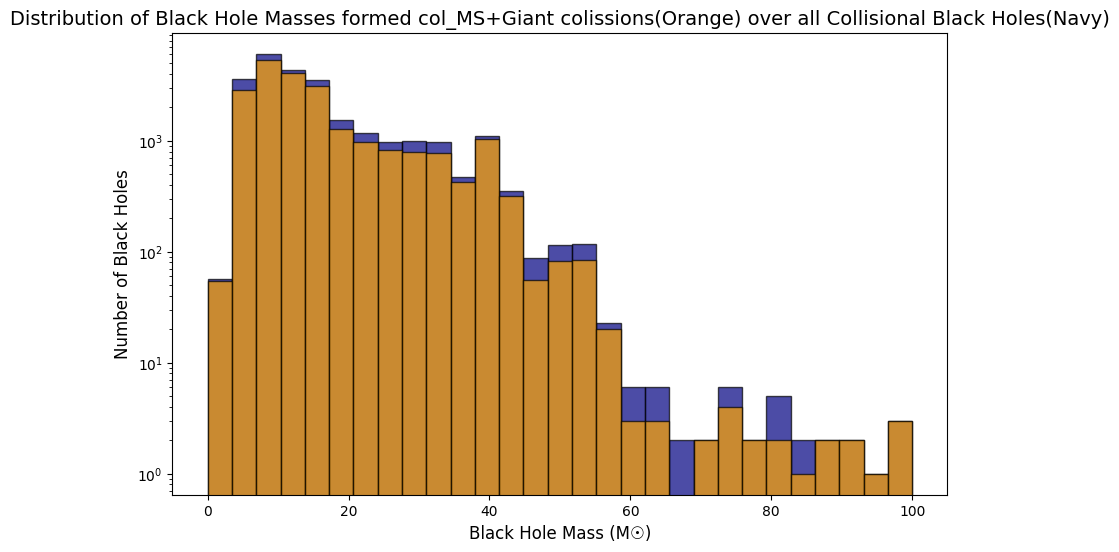

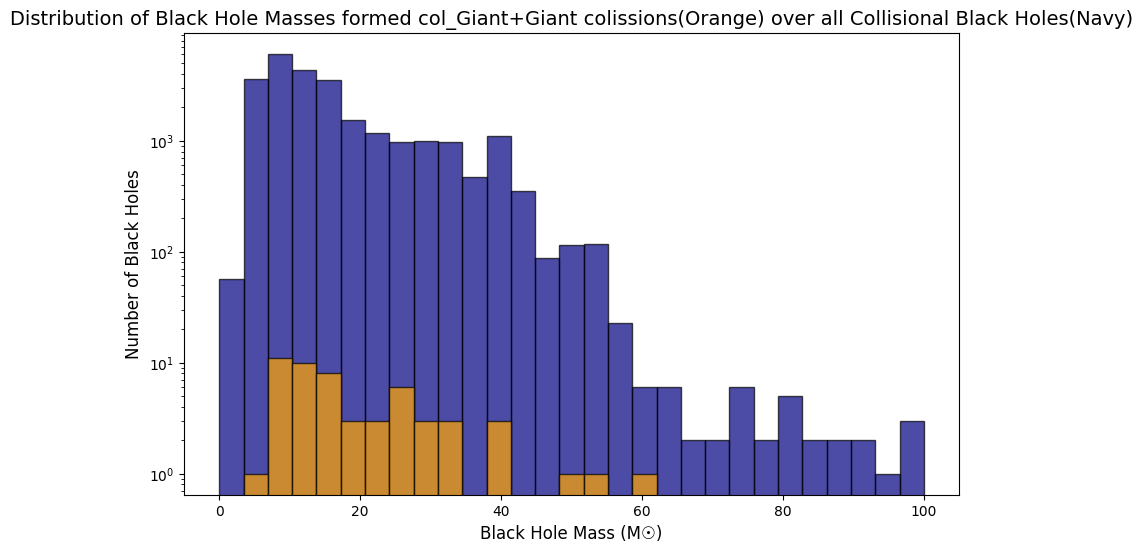

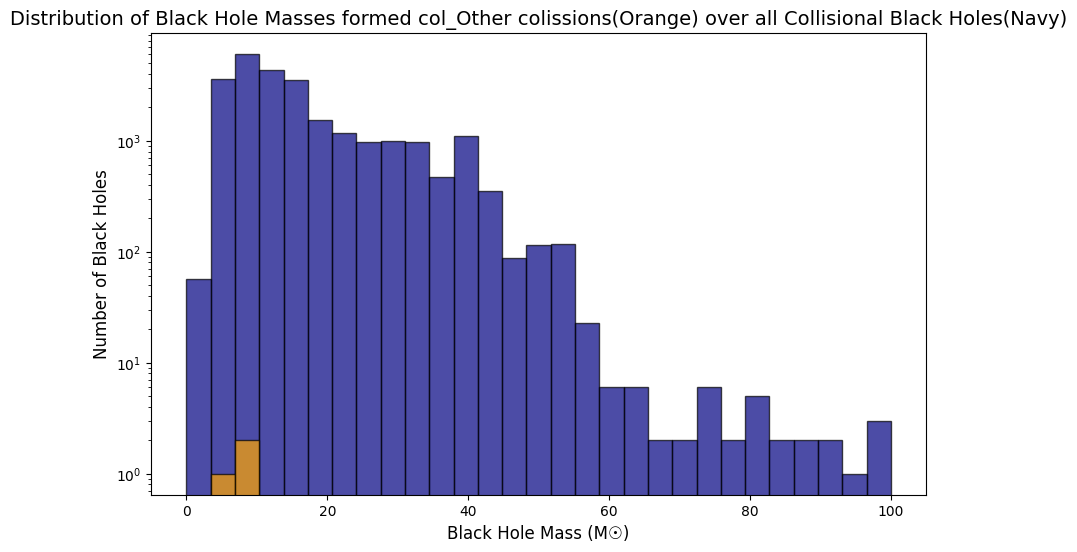

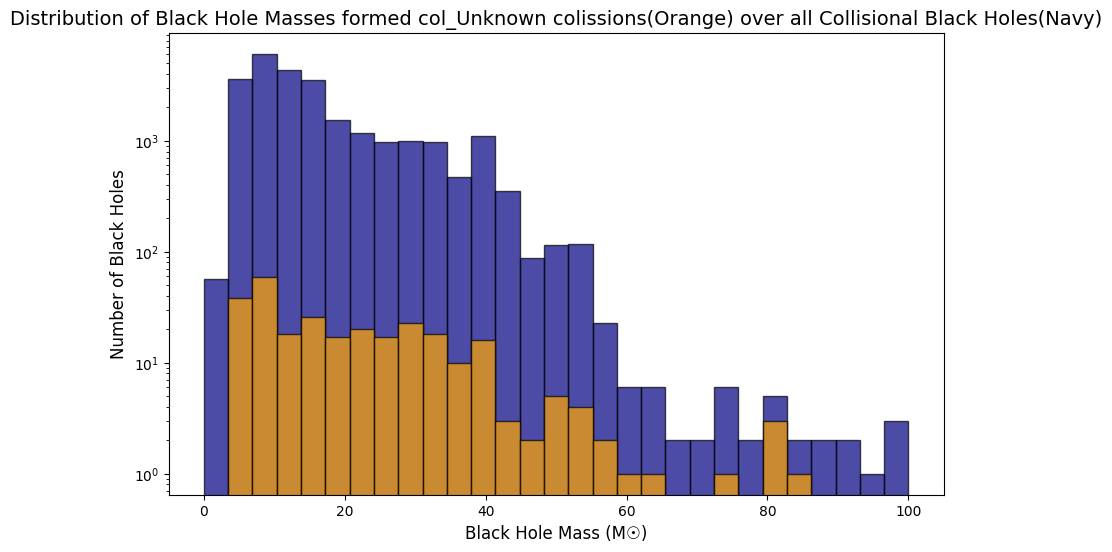

In [17]:

for name in names:
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 100, 30)  # Create bins upto 100 m sun
    plt.hist(col['bh_mass'], bins=bins, color='navy', alpha=0.7, edgecolor='black')
    plt.xlabel('Black Hole Mass (M☉)', fontsize=12)
    plt.ylabel('Number of Black Holes', fontsize=12)
    plt.title(f'Distribution of Black Hole Masses formed {name} colissions(Orange) over all Collisional Black Holes(Navy)', fontsize=14)
    col_bh_0= groups[name]
    bins2 = np.linspace(0, 100, 30)  # Create bins upto 100 m sun
    plt.hist(col_bh_0['bh_mass'], bins=bins2, color='orange', alpha=0.7, edgecolor='black')
    plt.yscale('log')
    plt.show()

# testing code

In [18]:
col_test=groups[names[0]]
